In [16]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import urllib.request

In [17]:
searchKey = input('검색 키워드 입력:')

In [18]:
driver = webdriver.Chrome()
driver.get("https://www.google.co.kr/imghp?hl=ko&tab=wi&authuser=0&ogbl")

Error getting version of chromedriver 115. Retrying with chromedriver 114 (attempt 1/5)


In [19]:
elem = driver.find_element("name", "q")
elem.send_keys(searchKey)
elem.send_keys(Keys.RETURN)

In [20]:
SCROLL_PAUSE_TIME = 1
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(SCROLL_PAUSE_TIME)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        try:
            driver.find_element(By.CSS_SELECTOR, ".mye4qd").click()
        except:
            break
    last_height = new_height

e :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="Sva75c"]/div[2]/div/div[2]/div[2]/div[2]/c-wiz/div/div[1]/div[2]/div[2]/div/a/img"}
  (Session info: chrome=115.0.5790.171); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
Backtrace:
	GetHandleVerifier [0x002FA813+48355]
	(No symbol) [0x0028C4B1]
	(No symbol) [0x00195358]
	(No symbol) [0x001C09A5]
	(No symbol) [0x001C0B3B]
	(No symbol) [0x001EE232]
	(No symbol) [0x001DA784]
	(No symbol) [0x001EC922]
	(No symbol) [0x001DA536]
	(No symbol) [0x001B82DC]
	(No symbol) [0x001B93DD]
	GetHandleVerifier [0x0055AABD+2539405]
	GetHandleVerifier [0x0059A78F+2800735]
	GetHandleVerifier [0x0059456C+2775612]
	GetHandleVerifier [0x003851E0+616112]
	(No symbol) [0x00295F8C]
	(No symbol) [0x00292328]
	(No symbol) [0x0029240B]
	(No symbol) [0x00284FF7]
	BaseThreadInitThunk [0x773800C9+25]
	RtlGetAppCon
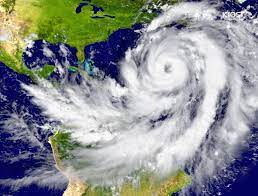
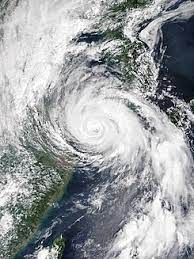

In [21]:
images = driver.find_elements(By.CSS_SELECTOR, ".rg_i.Q4LuWd")
count = 1
for image in images:
    try:
        image.click()
        time.sleep(0.5)
        imgUrl = driver.find_element(
            By.XPATH,
            '//*[@id="Sva75c"]/div[2]/div/div[2]/div[2]/div[2]/c-wiz/div/div[1]/div[2]/div[2]/div/a/img'
        ).get_attribute("src")
        opener = urllib.request.build_opener()
        opener.addheaders = [
            ('User-Agent',
             'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')
        ]
        urllib.request.install_opener(opener)
        urllib.request.urlretrieve(imgUrl, f'./imgs/{searchKey}{str(count)}.jpg')
        count = count + 1
    except Exception as e:
        print('e : ', e)
        pass

driver.close()

In [22]:
import os
import sys
import urllib.request
from selenium import webdriver
from time import sleep
from bs4 import BeautifulSoup

keyword = input('검색어 : ')
maxImages = int(input('다운로드 시도할 최대 이미지 수 : '))

# 프로젝트에 미리 생성해놓은 crawled_img폴더 안에 하위 폴더 생성
# 폴더명에는 입력한 키워드, 이미지 수 정보를 표시함
path = 'crawled_img/'+keyword+'_'+str(maxImages)

try:
    # 중복되는 폴더 명이 없다면 생성
    if not os.path.exists(path):
        os.makedirs(path)
    # 중복된다면 문구 출력 후 프로그램 종료
    else:
        print('이전에 같은 [검색어, 이미지 수]로 다운로드한 폴더가 존재합니다.')
        sys.exit(0)
except OSError:
    print ('os error')
    sys.exit(0)

pages = int((maxImages-1)/100)+1 #한 페이지당 표시되는 이미지 수(100)을 참고하여 확인할 페이지 수 계산
imgCount = 0 # 추출 시도 이미지 수
success = 0 # 추출 성공 이미지 수
finish = False # 이미지에 모두 접근했는지 여부

# 크롬 드라이버 설정
# (크롤링할 때 웹 페이지 띄우지 않음, gpu 사용 안함, 한글 지원, user-agent 헤더 추가)
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('lang=ko_KR')
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36")
driver = webdriver.Chrome('C:\chromedriver\chromedriver.exe',chrome_options=chrome_options)

for i in range(1,int(pages)+1):
    #웹 페이지 접근 후 1초동안 로드를 기다림
    driver.get('https://pixabay.com/images/search/'+keyword+'/?pagi='+str(i))
    sleep(1)

    #크롤링이 가능하도록 html코드 가공
    html = driver.page_source
    soup = BeautifulSoup(html,'html.parser')

    imgs = soup.select('div.flex_grid.credits.search_results img') #요소 선택

    #마지막 페이지 여부 결정
    lastPage=False
    if len(imgs)!=100:
        lastPage=True

    #5번 제목에서 설명함
    for img in imgs:
        srcset = ""
        if img.get('srcset')==None:
            srcset = img.get('data-lazy-srcset')
        else: 
            srcset = img.get('srcset')


        src = ""
        if len(srcset):
            src = str(srcset).split()[0] #가장 작은 사이즈의 이미지 경로 추출
            print(src)
            filename = src.split('/')[-1] #이미지 경로에서 날짜 부분뒤의 순 파일명만 추출
            print(filename)
            saveUrl = path+'/'+filename #저장 경로 결정
            print(saveUrl)

            #파일 저장
            #user-agent 헤더를 가지고 있어야 접근 허용하는 사이트도 있을 수 있음(pixabay가 이에 해당)
            req = urllib.request.Request(src, headers={'User-Agent': 'Mozilla/5.0'})
            try:
                imgUrl = urllib.request.urlopen(req).read() #웹 페이지 상의 이미지를 불러옴
                with open(saveUrl,"wb") as f: #디렉토리 오픈
                    f.write(imgUrl) #파일 저장
                success+=1
            except urllib.error.HTTPError:
                print('에러')
                sys.exit(0)

        imgCount+=1

        if imgCount==maxImages:
            finish = True #입력한 이미지 수 만큼 모두 접근했음을 알림
            break
    
    #finish가 참이거나 더 이상 접근할 이미지가 없을 경우 크롤링 종료
    if finish or lastPage:
        break

print('성공 : '+str(success)+', 실패 : '+str(maxImages-success))

TypeError: WebDriver.__init__() got an unexpected keyword argument 'chrome_options'

In [9]:
'''이때, a와 b의 내적은 a[0]*b[0] + a[1]*b[1] + ... + a[n-1]*b[n-1] 입니다. (n은 a, b의 길이)'''
a = [1,2,3,4]
b = [-3,-1,0,2]
# result = 3 
# a와 b의 내적은 1곱하기 -3 + 2곱하기 -1 더하기 .....
result =0
a1 =[]
for i in range(0, len(a)): 
    i = i+1
    a1.append(a[i-1] * b[i-1])
    result += a1[i-1]
print(result)

3


In [85]:
# x = 2 
# n = 5 
# answer = 2,4,6,8,10
x = 4
n = 3
# answer = 4,8,12
# x = -4
# n = 2
# answer = -4,-8 
lista = []
answer = ''
if x > 0:
    for i in range(x, x*n+1, x): # i = 0,1,2,3,4,5,6,7,8,9,10
        lista.append(i)
elif x < 0:
    for i in range(-x, -x*n+1, -x): # i = 0,1,2,3,4,5,6,7,8,9,10
        lista.append(-i)
print(lista)


[4, 8, 12]


In [88]:
lista = [93,45,21,30,20,94,66,71,45]
for a in range(len(lista)-1):
    for b in range(a+1, len(lista)):
        if lista[a] > lista[b]:
            temp = lista[a]
            lista[a] = lista[b]
            lista[b] = temp
print(lista)

[20, 21, 30, 45, 45, 66, 71, 93, 94]


In [91]:
lista = [[1,2,3], [2,3,4]]
print(len(lista))
print(len(lista[0]))
answer = []
arr1 = [[1,2], [2,3]]
arr2 = [[3,4], [5,6]]

for a in range(len(arr1)):
    temp = []
    for b in range(len(arr1[a])):
        temp.append(arr1[a][b]+arr2[a][b])
    answer.append(temp)
print(answer)

2
3
[[4, 6], [7, 9]]


In [94]:
lista = [93,45,21,30,20,94,66,71,45]
for a in range(0, len(lista)-1):
    for b in range(a+1, len(lista)):
        if lista[a] > lista[b]:
            temp = lista[a]
            lista[a] = lista[b]
            lista[b] = temp
print(lista)

[20, 21, 30, 45, 45, 66, 71, 93, 94]
